In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Diet_R.csv to Diet_R.csv


In [4]:
df = pd.read_csv('Diet_R.csv')
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,1,0,22,159,58,1,54.2
1,2,0,46,192,60,1,54.0
2,3,0,55,170,64,1,63.3
3,4,0,33,171,64,1,61.1
4,5,0,50,170,65,1,62.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        90 non-null     int64  
 1   gender        90 non-null     int64  
 2   Age           90 non-null     int64  
 3   Height        90 non-null     int64  
 4   pre.weight    90 non-null     int64  
 5   Diet          90 non-null     int64  
 6   weight6weeks  90 non-null     float64
dtypes: float64(1), int64(6)
memory usage: 5.0 KB


In [6]:
df['Diet'].value_counts()

1    30
2    30
3    30
Name: Diet, dtype: int64

In [7]:
df['gender'].value_counts()

0    50
1    40
Name: gender, dtype: int64

In [8]:
df.set_index('Person',inplace=True)
df.head()

,gender,Age,Height,pre.weight,Diet,weight6weeks
Person,,,,,,
1,0,22,159,58,1,54.2
2,0,46,192,60,1,54.0
3,0,55,170,64,1,63.3
4,0,33,171,64,1,61.1
5,0,50,170,65,1,62.2


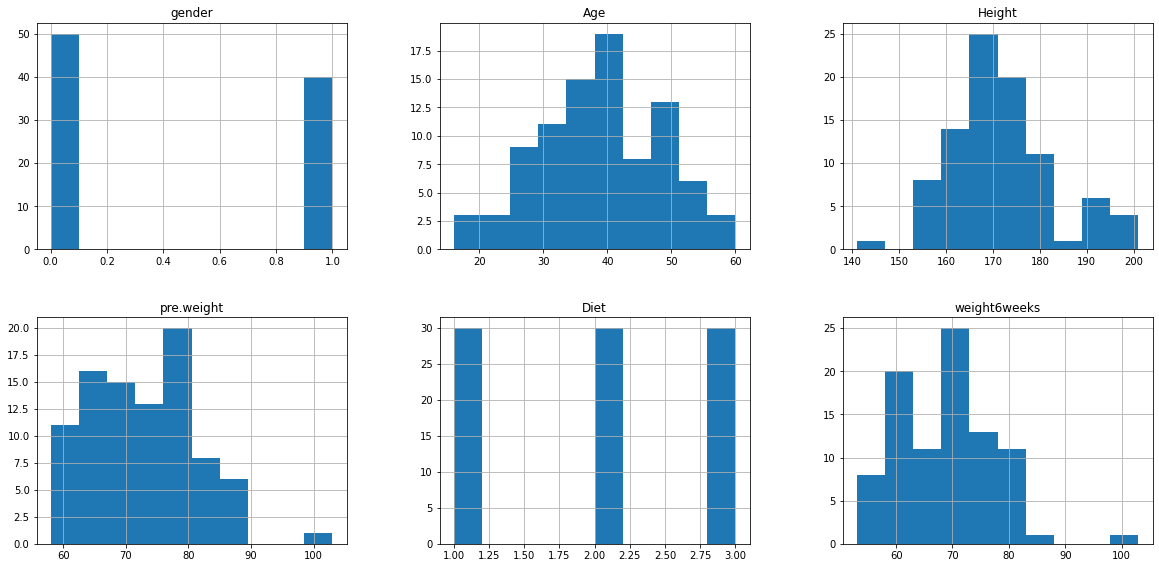

In [9]:
df.hist(layout=(3,3),figsize=(20,15))
plt.show()

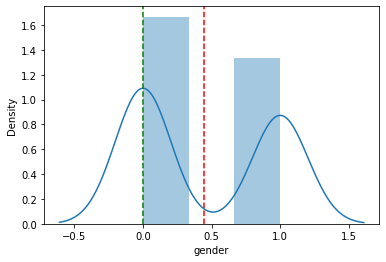

In [44]:
sns.distplot(df['gender'],kde=True,label='True')
plt.axvline(x=df['gender'].median(),color='green',ls='--')
plt.axvline(x=df['gender'].mean(),color='red',ls='--')
plt.show()

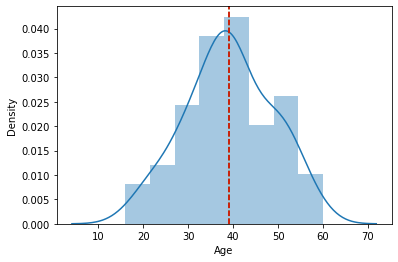

In [40]:
sns.distplot(df['Age'],kde=True,label='True')
plt.axvline(x=df['Age'].median(),color='green',ls='--')
plt.axvline(x=df['Age'].mean(),color='red',ls='--')
plt.show()

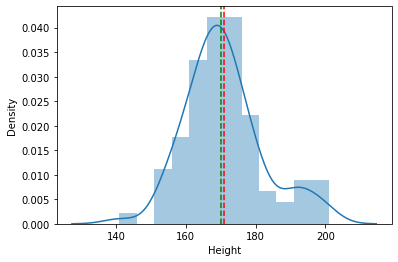

In [41]:
sns.distplot(df['Height'],kde=True,label='True')
plt.axvline(x=df['Height'].median(),color='green',ls='--')
plt.axvline(x=df['Height'].mean(),color='red',ls='--')
plt.show()

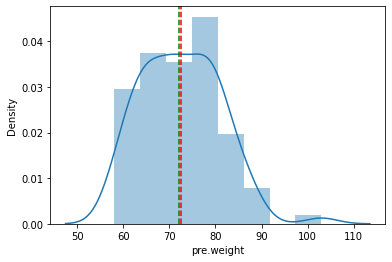

In [42]:
sns.distplot(df['pre.weight'],kde=True,label='True')
plt.axvline(x=df['pre.weight'].median(),color='green',ls='--')
plt.axvline(x=df['pre.weight'].mean(),color='red',ls='--')
plt.show()

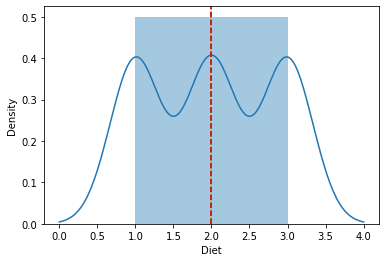

In [45]:
sns.distplot(df['Diet'],kde=True,label='True')
plt.axvline(x=df['Diet'].median(),color='green',ls='--')
plt.axvline(x=df['Diet'].mean(),color='red',ls='--')
plt.show()

This plot has multiple normal distributions.

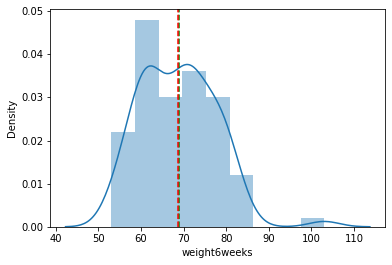

In [43]:
sns.distplot(df['weight6weeks'],kde=True,label='True')
plt.axvline(x=df['weight6weeks'].median(),color='green',ls='--')
plt.axvline(x=df['weight6weeks'].mean(),color='red',ls='--')
plt.show()

Except gender and Diet, other column follows normal distribution.

In [14]:
from scipy.stats import normaltest

In [24]:
print( '\nNormal test for height :\n', normaltest(df['Height']))


Normal test for height :
 NormaltestResult(statistic=7.588404773488763, pvalue=0.022500845634006717)


In [26]:
print( '\nNormal test for pre.weight :\n', normaltest(df['pre.weight']))


Normal test for pre.weight :
 NormaltestResult(statistic=3.8651889238516297, pvalue=0.14477210510000385)


In [27]:
print( '\nNormal test for weight6weeks :\n', normaltest(df['weight6weeks']))


Normal test for weight6weeks :
 NormaltestResult(statistic=8.756447725423044, pvalue=0.012547625145921754)


In [19]:
df['Age'].mean()

39.077777777777776

In [28]:
df['Height'].mean()

170.9

In [31]:
df['pre.weight'].mean()

72.53333333333333

In [20]:
df['Age'].std()

9.716460928947859

In [21]:
df.skew()

gender          0.227415
Age            -0.073027
Height          0.614859
pre.weight      0.450505
Diet            0.000000
weight6weeks    0.605891
dtype: float64

From this the data signifies, that 'Age' is *negatively skewed* and other columns are *positively skewed.*

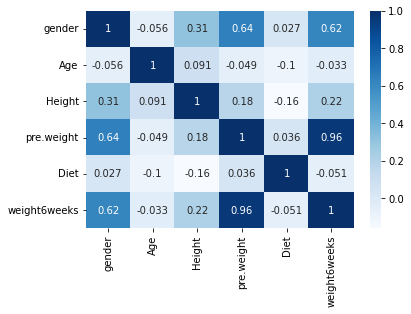

In [47]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

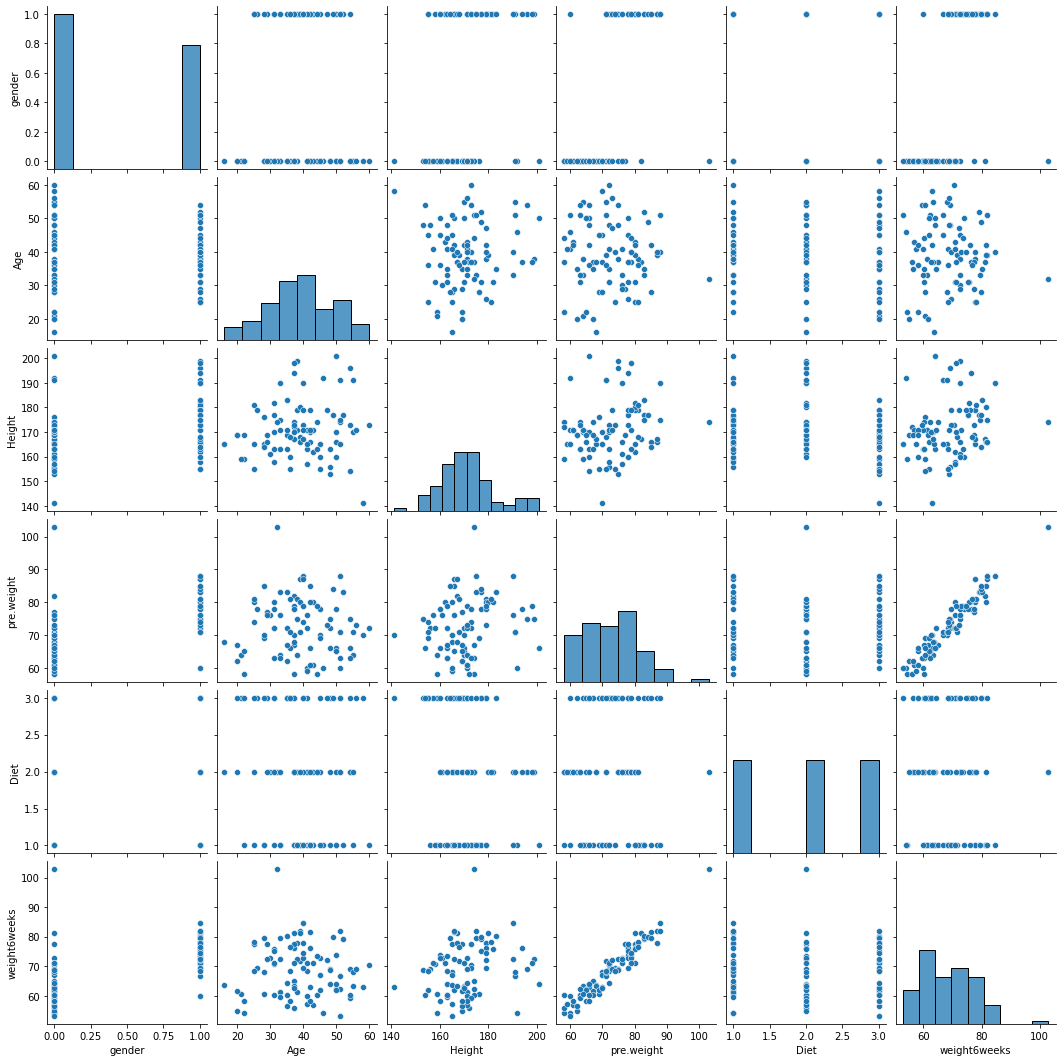

In [48]:
sns.pairplot(df)

Text(0.5, 1.0, 'Distribution of gender')

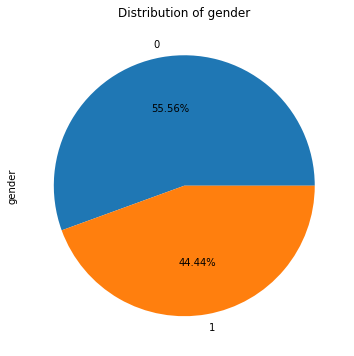

In [49]:
df['gender'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f%%')
plt.title("Distribution of gender")

Text(0.5, 1.0, 'Distribution of Diet')

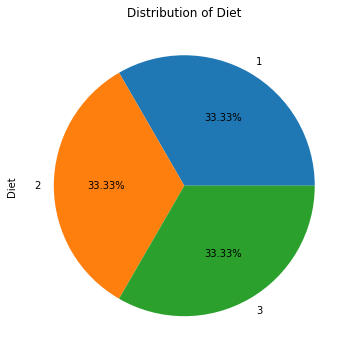

In [50]:
df['Diet'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f%%')
plt.title("Distribution of Diet")

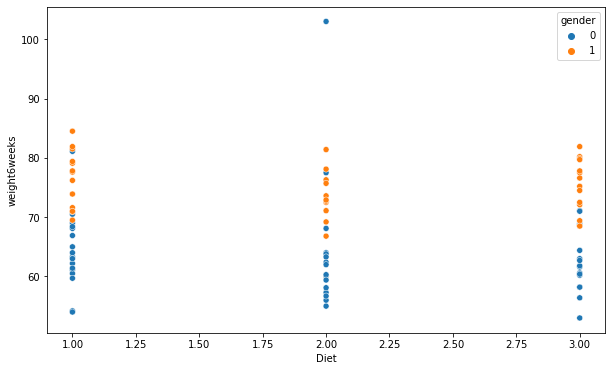

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Diet',y='weight6weeks',hue='gender')

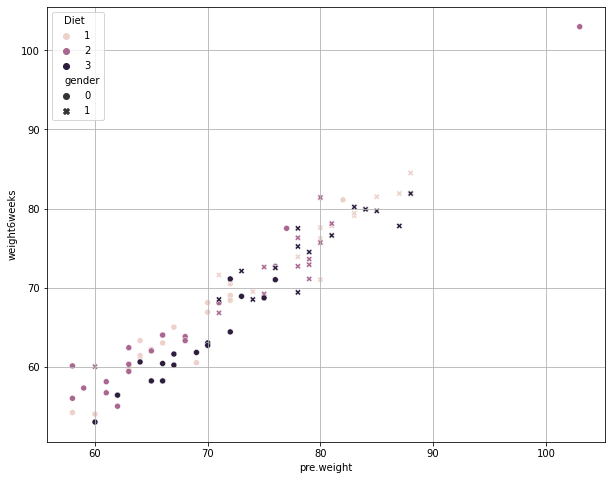

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="pre.weight",y="weight6weeks",hue='Diet',style = 'gender',data=df,ax=ax)
plt.grid()
plt.show()

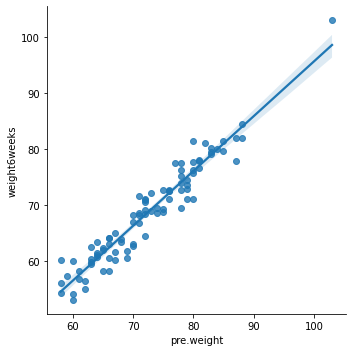

In [58]:
sns.lmplot(x="pre.weight",y="weight6weeks",data=df)

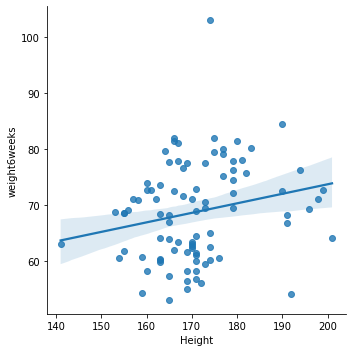

In [59]:
sns.lmplot(x="Height",y="weight6weeks",data=df)

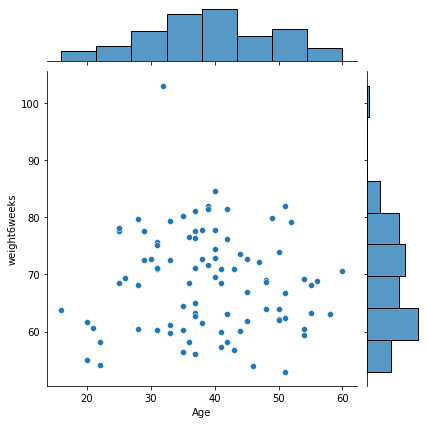

In [60]:
sns.jointplot(x="Age",y="weight6weeks",data=df)
plt.show()